In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner.Plot import InteractiveMap, PlotMesh, PlotPaths

In [2]:
OptInfo = {}
X     = [230,360]
Y     = [-80,-40]
d     = [5,2.5]
OptInfo['Start Time']           = '2017-03-15'
OptInfo['End Time']             = '2017-03-16'
OptInfo['WayPoints']            = '../../resources/WayPoints.csv'
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

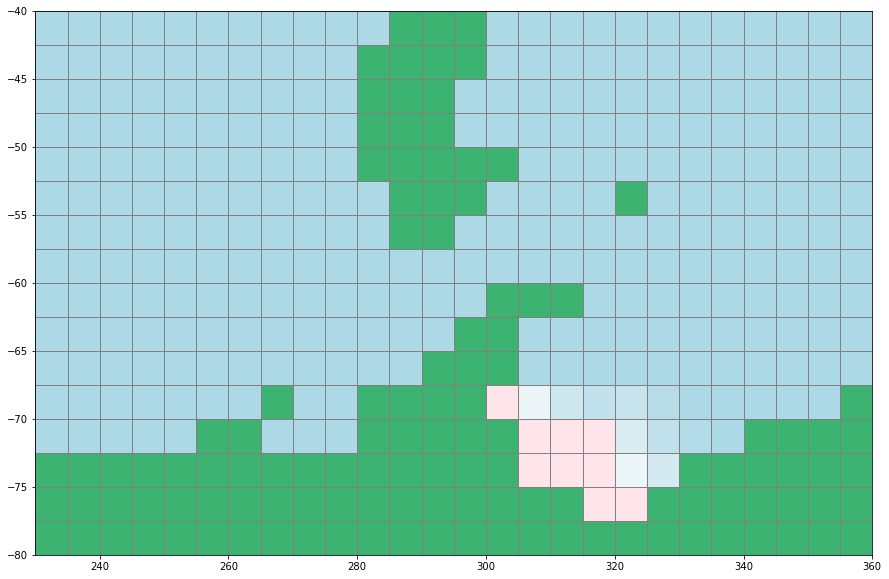

In [3]:
icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(0)
PlotMesh(cellGrid)

=== Processing Waypoint = MargueriteBay ===


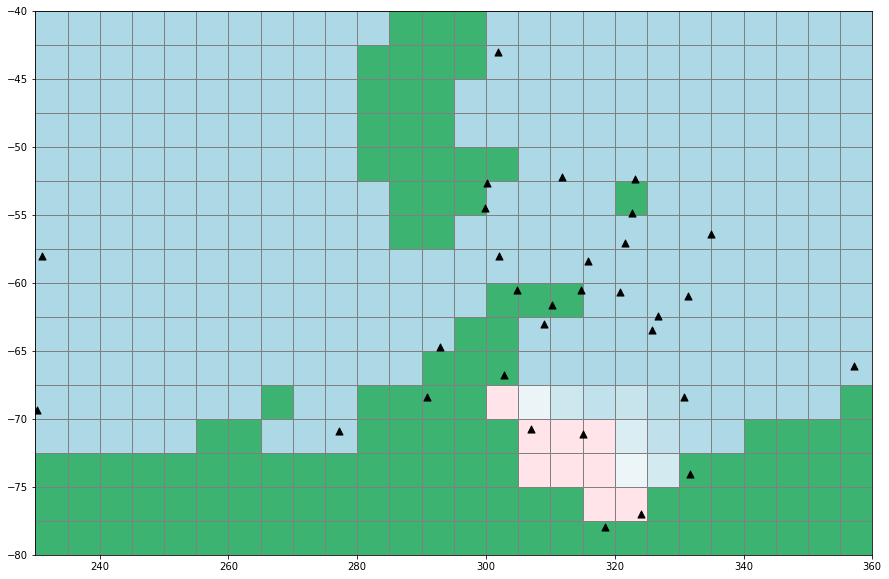

In [4]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(source_waypoints=['MargueriteBay'],verbrose=True)#,end_waypoints=['NorthPeninsula'])
PlotPaths(cellGrid,Paths,routepoints=False,Waypoints=TT.OptInfo['WayPoints'])

In [5]:
m = InteractiveMap(cellGrid,Paths,pd.read_csv('../../resources/WayPoints.csv'),SitesOfInterest=pd.read_csv('../../resources/BAS_Stations.csv'),SDA='/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-Positions')
m.save('WorkingExample_RealTime.html')
m

/Users/jsmith/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AssertionError: The field Cx is not available in the data. Choose from: ('Centroid', 'Depth', 'Ice Area', 'Index', 'Land', 'Vector').

In [ ]:
SmoothedPaths = TT.PathSmoothing([Paths[0]],maxiter=50)

In [ ]:
ax = Plot.Paths(cellGrid,SmoothedPaths,routepoints=True,Waypoints=TT.OptInfo['WayPoints'],return_ax=True)
ax.set_xlim([290,310])
ax.set_ylim([-65,-60])

ax.set_xlim([298.5,301])
ax.set_ylim([-63.5,-63])
